<a href="https://colab.research.google.com/github/dianamarchila/dianamarchila.github.io/blob/main/DataUnders_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto predicción de la reserva de dinero para reclamaciones en empresas de seguros**

**Data Understanding - V1**

Realizado por: Diana Archila Cordero

---



In [ ]:
# Configuración para ejecutar código de R
!pip install rpy2==3.5.1
%reload_ext rpy2.ipython

# **Describe data**

**Tamaño del set de datos**

El conjunto de datos tiene 3.400 observaciones y 13 variables, relacionadas con las reclamaciones de seguros por negligencia médica reportadas entre los años 1988 y 1997 en Estados Unidos.

La cantidad de observaciones corresponden al número de empresas, multiplicado por 100 resgistros de información que se tiene para cada una, los cuales corresponden a la información de reclamaciones durante 10 años para los siniestros ocurridos de 1988 a 1997. Es decir que se tienen para este set de datos 34 empresas aseguradoras.

**Variables que contiene**

A continuación se da la descripción de cada una de las variables del set de datos:

*   **GRCODE NAIC** Código que identifica la compañía aseguradora
*   **GRNAME NAIC** Nombre de la aseguradora
*   **AccidentYear** Año de ocurrencia del accidente, para el caso de estudio, estos datos están entre 1988 y 1997.
*   **DevelopmentYear** Año en que se da el cobro del seguro, puede ir desde el año del accidente hasta 10 años más.
*   **DevelopmentLag** Indicador del año de desarrollo a partir del año del accidente.
*   **IncurLoss_** Pérdidas reportadas en las que se ha incurrido y gastos ocasionados a final del año de desarrollo.
*   **CumPaidLoss_** Pérdidas pagadas acumuladas y gastos asignados al final de año.
*   **BulkLoss_** Información sobre pérdidas netas y gastos de defensa y contención de costos reportados al final del año, relacionados con siniestros ocurridos pero no comunicados (IBNR - incurred but not reported)
*   **PostedReserve97_** Reservas reportadas en el año 1997, tomadas de Anexo de Suscripción e Inversiones – Parte 2A, incluidas las pérdidas netas no pagadas y los gastos de ajuste de pérdidas no pagados
*   **EarnedPremDIR_** Primas ganadas directas y asumidas en el año de desarrollo
*   **EarnedPremCeded_** Primas ganadas cedidas en el año de desarrollo
*   **EarnedPremNet_** Primas ganadas netas en el año de desarrollo
*   **Single**  Variable binaria que indica si es una empresa aseguradora individual (1) o pertenece a un asegurador grupal (0).


In [ ]:
%%R # Comando que indica que la celda contiene código de R
library(dplyr)

# Cargue del dataset
data <- read.csv("/content/drive/MyDrive/ML /medmal_pos.csv")

print(nrow(data)) # 3.400 observaciones
print(ncol(data)) # 13 variables

head(data, 10)

[1] 3400
[1] 13
   GRCODE             GRNAME AccidentYear DevelopmentYear DevelopmentLag
1     669 Scpie Indemnity Co         1988            1988              1
2     669 Scpie Indemnity Co         1988            1989              2
3     669 Scpie Indemnity Co         1988            1990              3
4     669 Scpie Indemnity Co         1988            1991              4
5     669 Scpie Indemnity Co         1988            1992              5
6     669 Scpie Indemnity Co         1988            1993              6
7     669 Scpie Indemnity Co         1988            1994              7
8     669 Scpie Indemnity Co         1988            1995              8
9     669 Scpie Indemnity Co         1988            1996              9
10    669 Scpie Indemnity Co         1988            1997             10
   IncurLoss_F2 CumPaidLoss_F2 BulkLoss_F2 EarnedPremDIR_F2 EarnedPremCeded_F2
1        121905           2716       97966           129104              -6214
2        112211        

**Completitud de la información**

A partir de la estructura de los datos, se puede observar que no existen datos nulos en el dataset.

**Tipos de variable**

Según el cargue de la información, todas las variables son numéricas, a excepción de *GRNAME*, que es el nombre de la aseguradora. Sin embargo, a partir de la definición de las variables, las únicas que se tomarán como variables numéricas son aquellas que relacionan los gastos y costos incurridos por la reclamación de seguros; es decir: IncurLoss_F2, CumPaidLoss_F2, BulkLoss_F2, EarnedPremDIR_F2, EarnedPremCeded_F2 y EarnedPremNet_F2.

Las variables como GRCODE, AccidentYear, DevelopmentYear, DevelopmentLag y Single, se tomarán como variables discretas que permitirán el ordenamiento de los datos y la construcción de las matrices de pérdidas para cada empresa.

In [ ]:
%%R
# Estructura del set de datos
str(data)

summary(data)

'data.frame':	3400 obs. of  13 variables:
 $ GRCODE            : int  669 669 669 669 669 669 669 669 669 669 ...
 $ GRNAME            : chr  "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" ...
 $ AccidentYear      : int  1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 ...
 $ DevelopmentYear   : int  1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 ...
 $ DevelopmentLag    : int  1 2 3 4 5 6 7 8 9 10 ...
 $ IncurLoss_F2      : int  121905 112211 103226 99599 96006 90487 82640 80406 78920 78511 ...
 $ CumPaidLoss_F2    : int  2716 24576 43990 59722 71019 76354 76792 77207 77588 77656 ...
 $ BulkLoss_F2       : int  97966 64117 39008 20736 13599 10577 3762 2105 819 407 ...
 $ EarnedPremDIR_F2  : int  129104 129104 129104 129104 129104 129104 129104 129104 129104 129104 ...
 $ EarnedPremCeded_F2: int  -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 ...
 $ EarnedPremNet_F2  : int  135318 135318 135318 135318 135318 135318 135318 135318 135

# **Explore Data**

Teniendo en cuenta lo observado en la descripción de los datos, es importante ahora revisar las distribuciones y medidas de interés de ciertas variables, como lo serán las 6 variables numéricas mencionadas en la sección anterior, ya que son estas las que permitirán la construcción de los triángulos de Run-off. Asimismo, es importante entender las categorías de aquellas variables que se utilizarán para la clasificación de los datos, como lo son los códigos y nombres de la empresa, los años de desarrollo de los siniestros, años de ocurrencia de los mismos y la clasificación del tipo de empresa.

## Análisis univariado

Por medio de un análisis descriptivo, se busca entender la distribución y de los datos.

### Variables categóricas

**Identificador de la empresa**

Tanto el nombre como el código que tiene relacionado cada empresa, es un identificador único de la misma.

In [ ]:
%%R
require(dplyr)

n_companies <- data %>% group_by(GRNAME) %>% tally()

n_companies2 <- data %>% group_by(GRCODE) %>% tally()

print(n_companies)
print(n_companies2)

# A tibble: 34 × 2
   GRNAME                                 n
   <chr>                              <int>
 1 American Assoc Of Othodontists RRG   100
 2 California Healthcare Ins Co Inc     100
 3 Campmed Cas & Ind Co Inc MD          100
 4 Clinic Mut Ins Co RRG                100
 5 Community Blood Cntr Exch RRG        100
 6 Controlled Risk Ins Co Of VT Inc     100
 7 Dentists Ins Co                      100
 8 Eastern Dentists Ins Co RRG          100
 9 Franklin Cas Ins Co RRG              100
10 Great Amer Grp                       100
# ℹ 24 more rows
# ℹ Use `print(n = ...)` to see more rows
# A tibble: 34 × 2
   GRCODE     n
    <int> <int>
 1    669   100
 2    683   100
 3    841   100
 4   1406   100
 5   7854   100
 6  10019   100
 7  10115   100
 8  10232   100
 9  10341   100
10  10393   100
# ℹ 24 more rows
# ℹ Use `print(n = ...)` to see more rows


**Tipo de compañía aseguradora**

Se observa que la mayoría de empresas aseguradoras son de tipo individual (85%) y tan solo 5 empresas de las 34 del estudio son de tipo grupal.

# A tibble: 2 × 2
  Single         n
  <chr>      <int>
1 Grupal         5
2 Individual    29


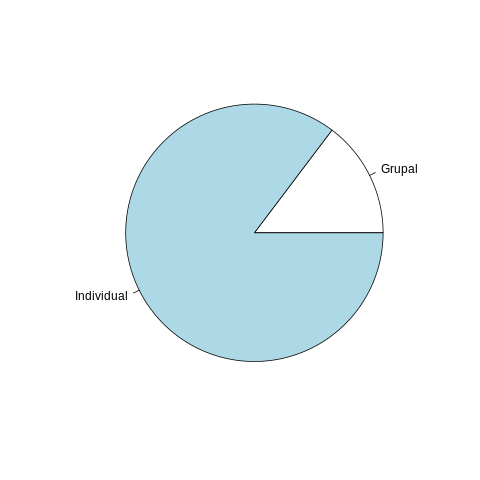

In [ ]:
%%R
require(dplyr)

data1 <- data

data1 <- data1 %>% mutate(Single = case_when(Single == 1 ~ 'Individual', TRUE ~ 'Grupal'))

tip_comp <- data1 %>% group_by(GRNAME, Single) %>% tally() %>% group_by(Single) %>% tally()

prop <- as.vector(tip_comp$n)
labels <- as.vector(tip_comp$Single)

pie(prop, labels = labels)

print(tip_comp)

**Años de ocurrencia y desarrollo de los siniestros**

No existen datos anómalos en estas dos variables, para el caso de año de accidente, se tiene que todos los datos se repiten igual cantidad de veces, lo que corresponde a que para todas las empresas se tomaron los mismos años de ocurrencia de los siniestros.

Por otra parte, en el caso de los años de desarrollo se observa que el año que más se repite es 1997, esto debido a que para todos los años de ocurrencia de sinestros, este será un año de desarrollo, cuando el siniestro ocurrió en 1988, 1997 será el último año de desarrollo y cuando el siniestro ocurrió en 1997, este será el primer año de observación de la evolución de reclamaciones.

Para los demás datos, la razón por la que varían de esta forma la frecuencia de observación, es la misma mencionada anteriormente, en el caso de 1988 este año de desarrollo solo se observará para los siniestros ocurridos ese mismo año, similar a lo que ocurre con el año de desarrollo 2006 que solo se observa para los siniestros ocurridos en 1997. La mejor forma de identificar esta relación año de ocurrencia - año de desarrollo es con la variable DevelopmetLag, que identifica el año de desarrollo como el año de observación a partir del año del siniestro.

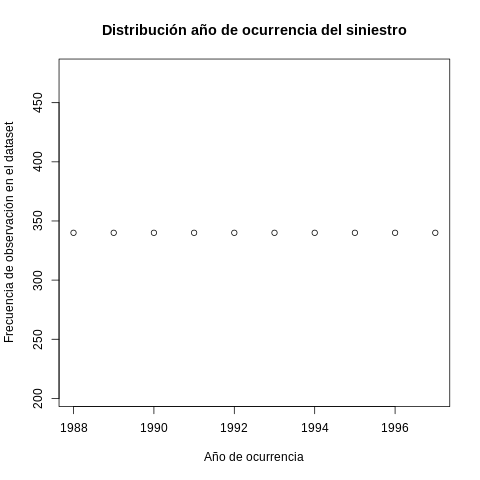

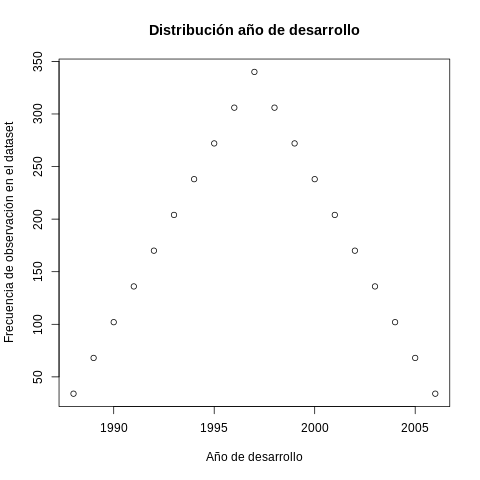

In [ ]:
%%R
require(dplyr)
require(ggplot)

accid_year <- data1 %>% group_by(AccidentYear) %>% tally()

dev_year <- data %>% group_by(DevelopmentYear) %>% tally()

plot(x=accid_year$AccidentYear, y = accid_year$n, main = "Distribución año de ocurrencia del siniestro",
     xlab = "Año de ocurrencia", ylab = "Frecuencia de observación en el dataset")

plot(x=dev_year$DevelopmentYear, y = dev_year$n, main = "Distribución año de desarrollo",
     xlab = "Año de desarrollo", ylab = "Frecuencia de observación en el dataset")


### Variables numéricas

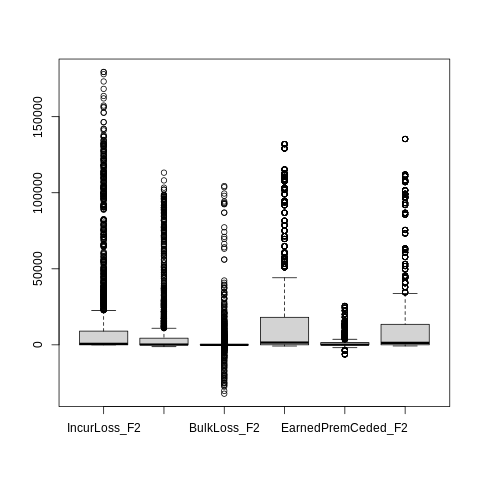

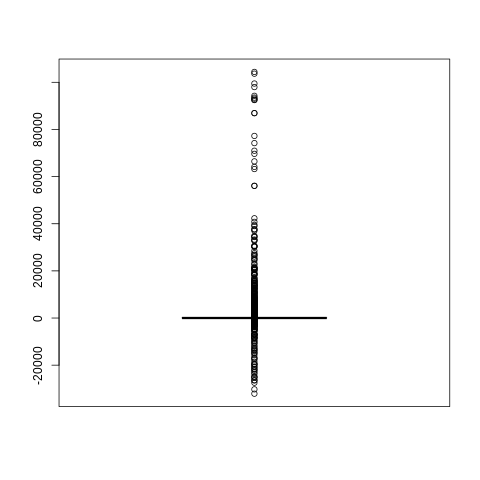

In [ ]:
%%R
require(dplyr)

#colnames(data1)

boxplot(data1[, c('IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2', 'EarnedPremDIR_F2', 'EarnedPremCeded_F2', 'EarnedPremNet_F2')],
        names= c('IncurLoss_F2', 'CumPaidLoss_F2', 'BulkLoss_F2',  'EarnedPremDIR_F2', 'EarnedPremCeded_F2', 'EarnedPremNet_F2'))


boxplot(data1[, c('BulkLoss_F2')])

# **Verify Data Quality**

**Unidad de medida**

A partir del entendimiento inicial del negocio y del contexto realizado, se tiene que la unidad de estudio será la evolución de los costos de reclamaciones para cada empresa de seguros. Dado esto, la unidad de medida será una matriz de 10x10 para cada empresa aseguradora, donde las filas serán los **años de ocurrencia de los siniestros (1988-1997)** y las columnas serán los **cobros ocasionados año a año por los siniestros ocurridos en el año de referencia**.

Para esto, se construirán las matrices para cada una de las 6 variables de interés.

In [ ]:
%%R
require(dplyr)

# Construcción de matrices de cada empresa, Variable: IncurLoss_F2
matrix_incloss <- data %>%
            mutate(t0 = case_when(DevelopmentLag == 1 ~ IncurLoss_F2),
                   t1 = case_when(DevelopmentLag == 2 ~ IncurLoss_F2),
                   t2 = case_when(DevelopmentLag == 3 ~ IncurLoss_F2),
                   t3 = case_when(DevelopmentLag == 4 ~ IncurLoss_F2),
                   t4 = case_when(DevelopmentLag == 5 ~ IncurLoss_F2),
                   t5 = case_when(DevelopmentLag == 6 ~ IncurLoss_F2),
                   t6 = case_when(DevelopmentLag == 7 ~ IncurLoss_F2),
                   t7 = case_when(DevelopmentLag == 8 ~ IncurLoss_F2),
                   t8 = case_when(DevelopmentLag == 9 ~ IncurLoss_F2),
                   t9 = case_when(DevelopmentLag == 10 ~ IncurLoss_F2)
                   )
matrix1 <- matrix_incloss %>% group_by(GRCODE, AccidentYear) %>%
          summarise(t0 = sum(t0, na.rm = T),
                    t1 = sum(t1, na.rm = T),
                    t2 = sum(t2, na.rm = T),
                    t3 = sum(t3, na.rm = T),
                    t4 = sum(t4, na.rm = T),
                    t5 = sum(t5, na.rm = T),
                    t6 = sum(t6, na.rm = T),
                    t7 = sum(t7, na.rm = T),
                    t8 = sum(t8, na.rm = T),
                    t9 = sum(t9, na.rm = T))

print(matrix1, n=10)

# Construcción de matrices de cada empresa, Variable: CumPaidLoss_F2
matrix_cumloss <- data %>%
            mutate(t0 = case_when(DevelopmentLag == 1 ~ CumPaidLoss_F2),
                   t1 = case_when(DevelopmentLag == 2 ~ CumPaidLoss_F2),
                   t2 = case_when(DevelopmentLag == 3 ~ CumPaidLoss_F2),
                   t3 = case_when(DevelopmentLag == 4 ~ CumPaidLoss_F2),
                   t4 = case_when(DevelopmentLag == 5 ~ CumPaidLoss_F2),
                   t5 = case_when(DevelopmentLag == 6 ~ CumPaidLoss_F2),
                   t6 = case_when(DevelopmentLag == 7 ~ CumPaidLoss_F2),
                   t7 = case_when(DevelopmentLag == 8 ~ CumPaidLoss_F2),
                   t8 = case_when(DevelopmentLag == 9 ~ CumPaidLoss_F2),
                   t9 = case_when(DevelopmentLag == 10 ~ CumPaidLoss_F2)
                   )
matrix2 <- matrix_cumloss %>% group_by(GRCODE, AccidentYear) %>%
          summarise(t0 = sum(t0, na.rm = T),
                    t1 = sum(t1, na.rm = T),
                    t2 = sum(t2, na.rm = T),
                    t3 = sum(t3, na.rm = T),
                    t4 = sum(t4, na.rm = T),
                    t5 = sum(t5, na.rm = T),
                    t6 = sum(t6, na.rm = T),
                    t7 = sum(t7, na.rm = T),
                    t8 = sum(t8, na.rm = T),
                    t9 = sum(t9, na.rm = T))

print(matrix2, n=10)

# Construcción de matrices de cada empresa, Variable: BulkLoss_F2
matrix_bulkloss <- data %>%
            mutate(t0 = case_when(DevelopmentLag == 1 ~ BulkLoss_F2),
                   t1 = case_when(DevelopmentLag == 2 ~ BulkLoss_F2),
                   t2 = case_when(DevelopmentLag == 3 ~ BulkLoss_F2),
                   t3 = case_when(DevelopmentLag == 4 ~ BulkLoss_F2),
                   t4 = case_when(DevelopmentLag == 5 ~ BulkLoss_F2),
                   t5 = case_when(DevelopmentLag == 6 ~ BulkLoss_F2),
                   t6 = case_when(DevelopmentLag == 7 ~ BulkLoss_F2),
                   t7 = case_when(DevelopmentLag == 8 ~ BulkLoss_F2),
                   t8 = case_when(DevelopmentLag == 9 ~ BulkLoss_F2),
                   t9 = case_when(DevelopmentLag == 10 ~ BulkLoss_F2)
                   )
matrix3 <- matrix_bulkloss %>% group_by(GRCODE, AccidentYear) %>%
          summarise(t0 = sum(t0, na.rm = T),
                    t1 = sum(t1, na.rm = T),
                    t2 = sum(t2, na.rm = T),
                    t3 = sum(t3, na.rm = T),
                    t4 = sum(t4, na.rm = T),
                    t5 = sum(t5, na.rm = T),
                    t6 = sum(t6, na.rm = T),
                    t7 = sum(t7, na.rm = T),
                    t8 = sum(t8, na.rm = T),
                    t9 = sum(t9, na.rm = T))

# Construcción de matrices de cada empresa, Variable: EarnedPremDIR_F2
matrix_dir <- data %>%
            mutate(t0 = case_when(DevelopmentLag == 1 ~ EarnedPremDIR_F2),
                   t1 = case_when(DevelopmentLag == 2 ~ EarnedPremDIR_F2),
                   t2 = case_when(DevelopmentLag == 3 ~ EarnedPremDIR_F2),
                   t3 = case_when(DevelopmentLag == 4 ~ EarnedPremDIR_F2),
                   t4 = case_when(DevelopmentLag == 5 ~ EarnedPremDIR_F2),
                   t5 = case_when(DevelopmentLag == 6 ~ EarnedPremDIR_F2),
                   t6 = case_when(DevelopmentLag == 7 ~ EarnedPremDIR_F2),
                   t7 = case_when(DevelopmentLag == 8 ~ EarnedPremDIR_F2),
                   t8 = case_when(DevelopmentLag == 9 ~ EarnedPremDIR_F2),
                   t9 = case_when(DevelopmentLag == 10 ~ EarnedPremDIR_F2)
                   )
matrix4 <- matrix_dir %>% group_by(GRCODE, AccidentYear) %>%
          summarise(t0 = sum(t0, na.rm = T),
                    t1 = sum(t1, na.rm = T),
                    t2 = sum(t2, na.rm = T),
                    t3 = sum(t3, na.rm = T),
                    t4 = sum(t4, na.rm = T),
                    t5 = sum(t5, na.rm = T),
                    t6 = sum(t6, na.rm = T),
                    t7 = sum(t7, na.rm = T),
                    t8 = sum(t8, na.rm = T),
                    t9 = sum(t9, na.rm = T))

# Construcción de matrices de cada empresa, Variable: EarnedPremDIR_F2
matrix_ceded <- data %>%
            mutate(t0 = case_when(DevelopmentLag == 1 ~ EarnedPremCeded_F2),
                   t1 = case_when(DevelopmentLag == 2 ~ EarnedPremCeded_F2),
                   t2 = case_when(DevelopmentLag == 3 ~ EarnedPremCeded_F2),
                   t3 = case_when(DevelopmentLag == 4 ~ EarnedPremCeded_F2),
                   t4 = case_when(DevelopmentLag == 5 ~ EarnedPremCeded_F2),
                   t5 = case_when(DevelopmentLag == 6 ~ EarnedPremCeded_F2),
                   t6 = case_when(DevelopmentLag == 7 ~ EarnedPremCeded_F2),
                   t7 = case_when(DevelopmentLag == 8 ~ EarnedPremCeded_F2),
                   t8 = case_when(DevelopmentLag == 9 ~ EarnedPremCeded_F2),
                   t9 = case_when(DevelopmentLag == 10 ~ EarnedPremCeded_F2)
                   )
matrix5 <- matrix_ceded %>% group_by(GRCODE, AccidentYear) %>%
          summarise(t0 = sum(t0, na.rm = T),
                    t1 = sum(t1, na.rm = T),
                    t2 = sum(t2, na.rm = T),
                    t3 = sum(t3, na.rm = T),
                    t4 = sum(t4, na.rm = T),
                    t5 = sum(t5, na.rm = T),
                    t6 = sum(t6, na.rm = T),
                    t7 = sum(t7, na.rm = T),
                    t8 = sum(t8, na.rm = T),
                    t9 = sum(t9, na.rm = T))

# Construcción de matrices de cada empresa, Variable: EarnedPremNet_F2
matrix_net <- data %>%
            mutate(t0 = case_when(DevelopmentLag == 1 ~ EarnedPremNet_F2),
                   t1 = case_when(DevelopmentLag == 2 ~ EarnedPremNet_F2),
                   t2 = case_when(DevelopmentLag == 3 ~ EarnedPremNet_F2),
                   t3 = case_when(DevelopmentLag == 4 ~ EarnedPremNet_F2),
                   t4 = case_when(DevelopmentLag == 5 ~ EarnedPremNet_F2),
                   t5 = case_when(DevelopmentLag == 6 ~ EarnedPremNet_F2),
                   t6 = case_when(DevelopmentLag == 7 ~ EarnedPremNet_F2),
                   t7 = case_when(DevelopmentLag == 8 ~ EarnedPremNet_F2),
                   t8 = case_when(DevelopmentLag == 9 ~ EarnedPremNet_F2),
                   t9 = case_when(DevelopmentLag == 10 ~ EarnedPremNet_F2)
                   )
matrix6 <- matrix_net %>% group_by(GRCODE, AccidentYear) %>%
          summarise(t0 = sum(t0, na.rm = T),
                    t1 = sum(t1, na.rm = T),
                    t2 = sum(t2, na.rm = T),
                    t3 = sum(t3, na.rm = T),
                    t4 = sum(t4, na.rm = T),
                    t5 = sum(t5, na.rm = T),
                    t6 = sum(t6, na.rm = T),
                    t7 = sum(t7, na.rm = T),
                    t8 = sum(t8, na.rm = T),
                    t9 = sum(t9, na.rm = T))


`summarise()` has grouped output by 'GRCODE'. You can override using the
`.groups` argument.
# A tibble: 340 × 12
# Groups:   GRCODE [34]
   GRCODE AccidentYear     t0     t1     t2     t3     t4    t5    t6    t7
    <int>        <int>  <int>  <int>  <int>  <int>  <int> <int> <int> <int>
 1    669         1988 121905 112211 103226  99599  96006 90487 82640 80406
 2    669         1989 122679 113165 110037 101142  90817 81919 77491 73577
 3    669         1990 118157 117497 116377  99895  89252 81916 79134 76333
 4    669         1991 117981 122443 121056 113795 102830 98071 94870 91062
 5    669         1992 131059 130155 124195 113974 106817 99182 92588 91000
 6    669         1993 134700 130757 125253 114717 111294 98014 96872 95714
 7    669         1994 136749 128192 121355 111877  96152 91502 90498 91870
 8    669         1995 140962 132405 118332 100050  88809 82360 81986 81887
 9    669         1996 134473 128980 113645 104273  99276 97782 97282 97738
10    669         1997 137

**Medidas descriptivas de cada variable**

Es importante poder resumir y comparar la información que se está registrando en la matriz de cada empresa, para lo cual se hallan a continuación las medias por fila. Para saber si hay empresas aseguradoras en las que se haya reportado cantidades similares de dinero. Para esta comparación, se trabajará únicamente con las variables IncurLoss_F2 y CumPaidLoss_F2, que corresponden a las pérdidas reportadas y las pérdidas pagadas; respectivamente.


In [1]:
%%R
require(dplyr)

years <- data %>% group_by(AccidentYear) %>% tally()
#nrow(years)

means_matrix <- data.frame()

#i = 1

for (i in 1:nrow(years)){
    year_i <- years$AccidentYear[i]

    temp_year <- matrix1 %>% filter(AccidentYear == 1988)#year_i)

    matrix1_means <- as.data.frame(t(as.matrix(colMeans(temp_year[,3:12])))) %>% mutate(year_n = year_i)

    rownames(matrix1_means) <- NULL

    means_matrix <- rbind(means_matrix, matrix1_means)
    print(matrix1_means)
}



UsageError: Cell magic `%%R` not found.
